# ESA Data Analysis


### Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc = {'figure.figsize':(15,8)}, color_codes=True)

## 2017 Expenditures Data

In [2]:
expend2017_df = pd.read_csv('esa_expenditures2017.csv')
expend2017_df = expend2017_df[['Group','Status','Scientific Name',
                 'Inverted Common Name','FWS 2017','Other Fed 2017',
                            'States 2017','Total 2017','Area']]
expend2017_df.head()

,Group,Status,Scientific Name,Inverted Common Name,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area
0,Amphibians,E,arroyo southwestern,"toad, arroyo",245087,375272,0,620359,NaN
1,Amphibians,T,ambystoma californiense,"salamander, california tiger",737957,1052249,0,1790206,u.s.a.
2,Amphibians,E,ambystoma californiense,"salamander, california tiger",570447,52156,0,622603,u.s.a.
3,Amphibians,E,ambystoma californiense,"salamander, california tiger",541608,100600,0,642208,u.s.a.
4,Amphibians,E,eurycea sosorum,"salamander, barton springs",15000,300,0,15300,wherever found


### Let's take a look at the funding distribution per group starting with the top 5:

Text(0.5, 1.0, '2017 Total Funding in USD for Top 5 Groups')

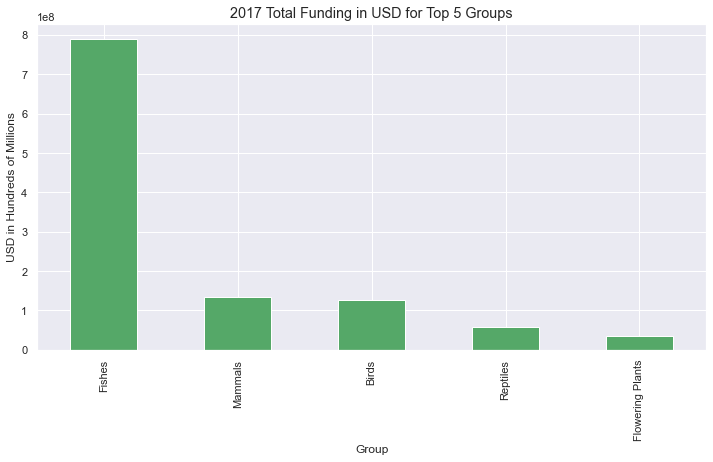

In [3]:
#barplot of the total funding received by top 5 groups
plt.figure(figsize = (12,6))
expend2017_df.groupby('Group')['Total 2017'].sum().sort_values(ascending=False).head().plot.bar(color = 'g')
plt.xlabel('Group')
plt.ylabel('USD in Hundreds of Millions')
plt.title('2017 Total Funding in USD for Top 5 Groups', size = 'large')



### Now let's look at the funding distribution for the lowest 5:

In [4]:
expend2017_df.groupby('Group')['Total 2017'].sum().sort_values(ascending=True).head()

Group
Lichens                  99000
Arachnids               266383
Ferns and Allies        770333
Conifers and Cycads     834246
Crustaceans            3390124
Name: Total 2017, dtype: int64

Text(0.5, 1.0, '2017 Total Funding in USD for Lowest 5 Groups')

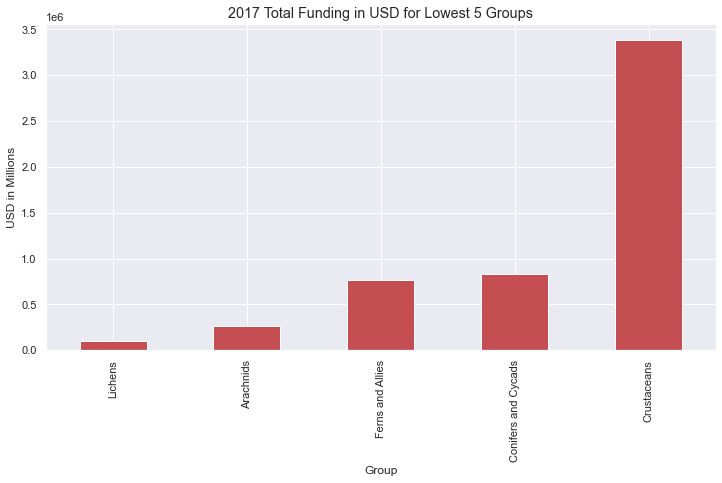

In [5]:
#barplot of the total funding received by least 5 groups
plt.figure(figsize = (12,6))
expend2017_df.groupby('Group')['Total 2017'].sum().sort_values(
    ascending=True).head().plot.bar(color = 'r')
plt.xlabel('Group')
plt.ylabel('USD in Millions')
plt.title('2017 Total Funding in USD for Lowest 5 Groups', size = 'large')


### Now let's take a look at the top 10 funded species populations:

In [6]:
_2017top_15 = expend2017_df.sort_values(by="Total 2017",
                                        ascending=False).head(15)
_2017top_15

,Group,Status,Scientific Name,Inverted Common Name,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area
385,Fishes,T,oncorhynchus,"salmon, chinook",273000,117927481,1026624,119227105,NaN
428,Fishes,T,oncorhynchus,steelhead,92000,58291541,1767150,60150691,NaN
435,Fishes,T,oncorhynchus,steelhead,398185,53950695,874763,55223643,NaN
374,Fishes,T,oncorhynchus,"salmon, chinook",22123,48745659,267583,49035365,NaN
424,Fishes,E,scaphirhynchus albus,"sturgeon, pallid",2089909,32033233,78000,34201142,wherever found
412,Fishes,T,salvelinus confluentus,"trout, bull",9021195,23318508,1295760,33635463,"u.s.a., conterminous, lower 49 states"
384,Fishes,T,oncorhynchus,"salmon, chinook",376500,32264433,195502,32836435,NaN
389,Fishes,E,oncorhynchus,"salmon, chinook",142000,31390212,263029,31795241,NaN
433,Fishes,T,oncorhynchus,steelhead,217500,26595918,310630,27124048,NaN
388,Fishes,T,oncorhynchus,"salmon, chinook",715062,20966939,862859,22544860,NaN


Text(0.5, 1.0, 'FY 2017 Top 15 Funded Species Populations')

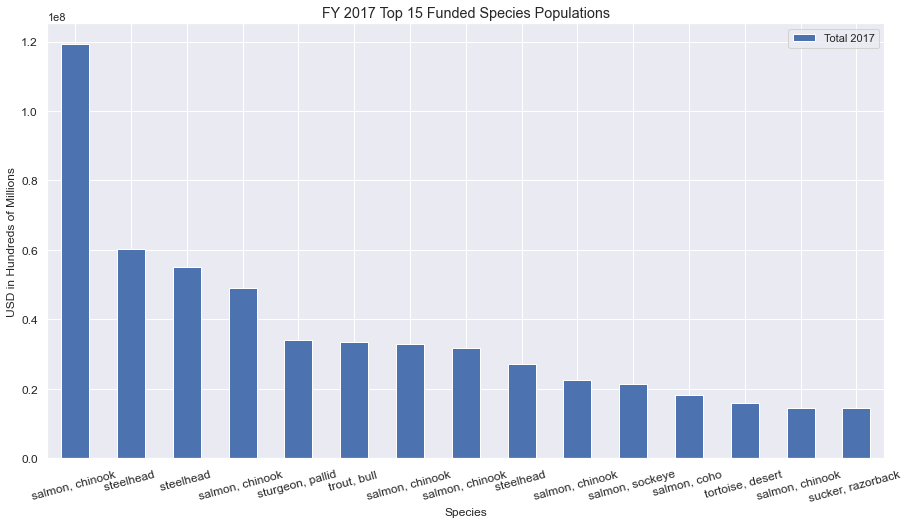

In [7]:
_2017top_15.plot(x="Inverted Common Name", y="Total 2017", kind="bar", rot=15, fontsize=12)
plt.xlabel('Species')
plt.ylabel('USD in Hundreds of Millions')
plt.title('FY 2017 Top 15 Funded Species Populations', size='large')

### The top 15 most funded species populations account for only 8 species...
All but 1 of which are in the Fishes Group in 2017.

Text(0.5, 1.0, 'Number of Populations per Top Funded Species')

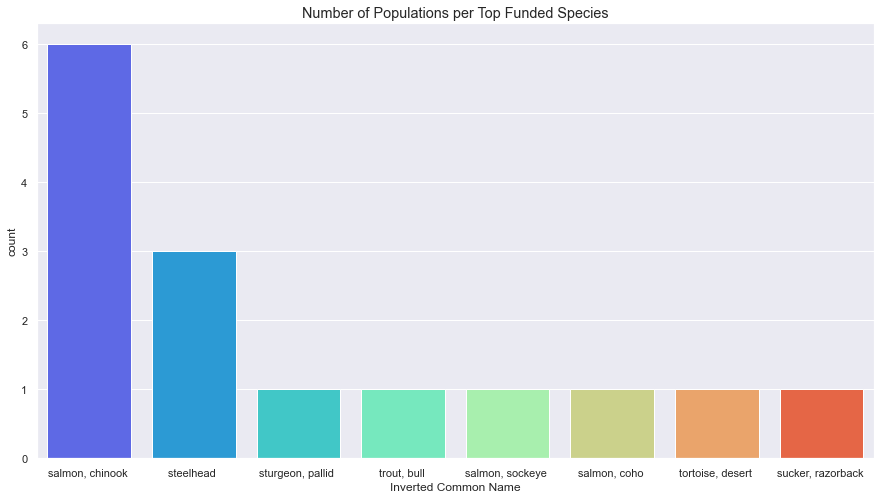

In [8]:
sns.countplot(x="Inverted Common Name", data=_2017top_15, palette="rainbow")
plt.title('Number of Populations per Top Funded Species', size='large')

## 2018 Expenditures Data

In [9]:
expend2018_df = pd.read_csv('esa_expenditures2018.csv')
expend2018_df = expend2018_df[['Group','Status','Scientific Name',
                                'Inverted Common Name','FWS 2018',
                               'Other Fed 2018','States 2018',
                               'Total 2018','Area']]
expend2018_df.head()

,Group,Status,Scientific Name,Inverted Common Name,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area
0,Amphibians,T,peltophryne lemur,"toad, puerto rican crested",5000,142491,0,147491,wherever found
1,Amphibians,E,bufo hemiophrys baxteri,"toad, wyoming",331300,14500,15251,361051,wherever found
2,Amphibians,E,rana muscosa,"frog, mountain yellow-legged",76115,60706,0,136821,southern california dps
3,Amphibians,E,bufo houstonensis,"toad, houston",111000,132007,4387,247394,wherever found
4,Amphibians,E,arroyo southwestern,"toad, arroyo",257341,737609,0,994950,NaN


### Let's take a look at the funding distribution per group:

In [10]:
expend2018_df.groupby('Group')['Total 2018'].sum().sort_values(ascending=False)

Group
Fishes                 843515825
Birds                  165192822
Mammals                120667873
Reptiles                57034585
Flowering Plants        31303469
Amphibians              13495059
Insects                 13110331
Clams                    8077791
Corals                   7568036
Snails                   5370138
Crustaceans              3325229
Ferns and Allies          563312
Conifers and Cycads       253224
Arachnids                  93502
Lichens                    41400
Name: Total 2018, dtype: int64

### Top 5 groups

Text(0.5, 1.0, '2018 Total Funding in USD for Top 5 Groups')

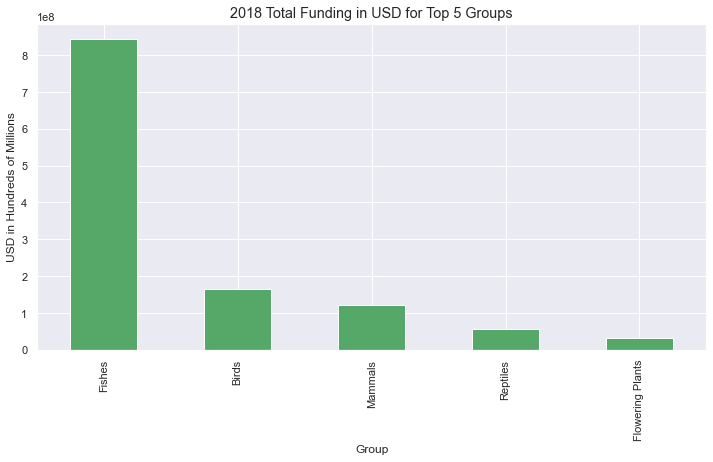

In [11]:
#barplot of the total funding received by top 5 groups
plt.figure(figsize = (12,6))
expend2018_df.groupby('Group')['Total 2018'].sum().sort_values(
    ascending=False).head().plot.bar(color = 'g')
plt.xlabel('Group')
plt.ylabel('USD in Hundreds of Millions')
plt.title('2018 Total Funding in USD for Top 5 Groups', size = 'large')


From the above graph, it is clear that the funding is unevenly distributed, with the Fishes group receiving the majority of total funding

### Bottom 5 groups

Text(0.5, 1.0, '2018 Total Funding in USD for Least 5 Groups')

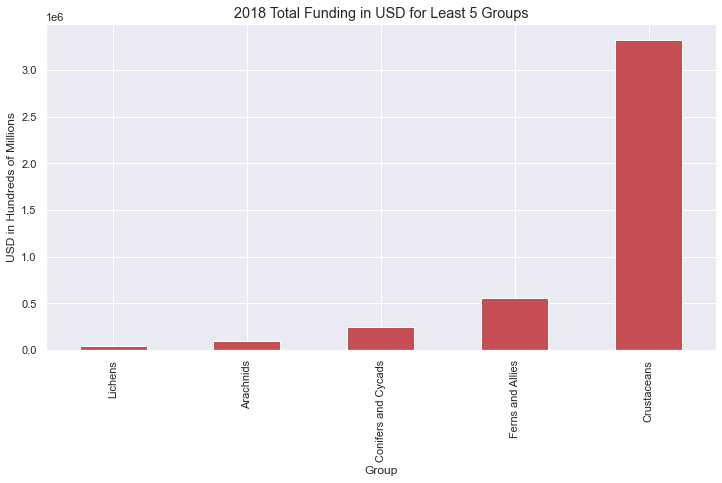

In [12]:
#barplot of the total funding received by least 5 groups
plt.figure(figsize = (12,6))
expend2018_df.groupby('Group')['Total 2018'].sum().sort_values(
    ascending=True).head().plot.bar(color = 'r')
plt.xlabel('Group')
plt.ylabel('USD in Hundreds of Millions')
plt.title('2018 Total Funding in USD for Least 5 Groups', size = 'large')


### Let's look at the top 15 populations for 2018...

In [13]:
_2018top_15 = expend2018_df.sort_values(by="Total 2018",
                                        ascending=False).head(15)
_2018top_15

,Group,Status,Scientific Name,Inverted Common Name,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area
499,Fishes,T,oncorhynchus,"salmon, chinook",213546,10543952,63067800,73825298,NaN
419,Fishes,T,oncorhynchus,steelhead,115300,59631969,1865400,61612669,NaN
364,Fishes,T,oncorhynchus,steelhead,20903,57148406,1056000,58225309,NaN
509,Fishes,T,oncorhynchus,"salmon, chinook",302988,55493134,1175000,56971122,NaN
136,Birds,T,strix occidentalis caurina,"owl, northern spotted",4072138,40446261,914600,45432999,wherever found
502,Fishes,E,oncorhynchus,"salmon, chinook",157909,36685972,5163800,42007681,NaN
398,Fishes,T,salvelinus confluentus,"trout, bull",7335866,29273292,3655500,40264658,"u.s.a., conterminous, lower 48 states"
497,Fishes,T,oncorhynchus,"salmon, chinook",391488,35468592,408900,36268980,NaN
382,Fishes,T,oncorhynchus,steelhead,139229,29601351,2741600,32482180,NaN
500,Fishes,T,oncorhynchus,"salmon, chinook",754988,19752046,9555200,30062234,NaN


Text(0.5, 1.0, 'FY 2018 Top 15 Funded Species Populations')

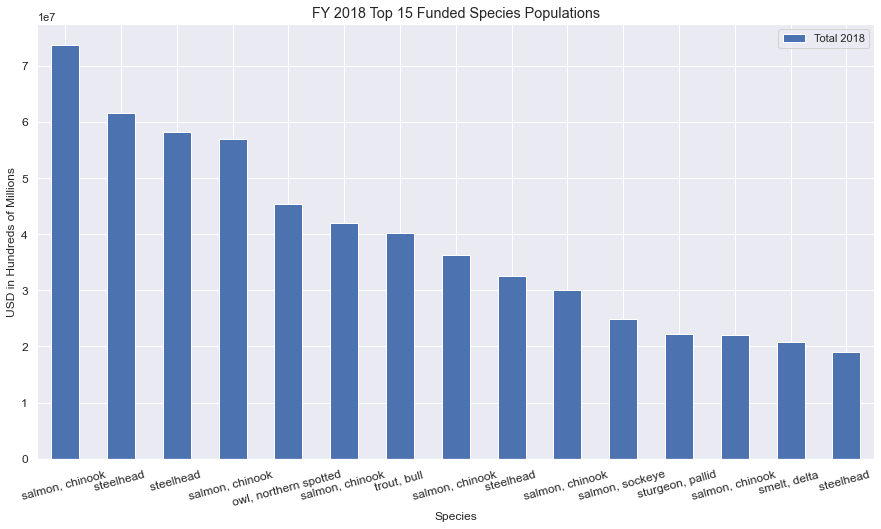

In [14]:
_2018top_15.plot(x="Inverted Common Name", y="Total 2018", kind="bar", rot=15, fontsize=12)
plt.xlabel('Species')
plt.ylabel('USD in Hundreds of Millions')
plt.title('FY 2018 Top 15 Funded Species Populations', size='large')

### The top 15 most funded species populations account for only 7 species...
All but 1 of which are in the Fishes Group in 2018.

Text(0.5, 1.0, 'Number of Populations per Top Funded Species')

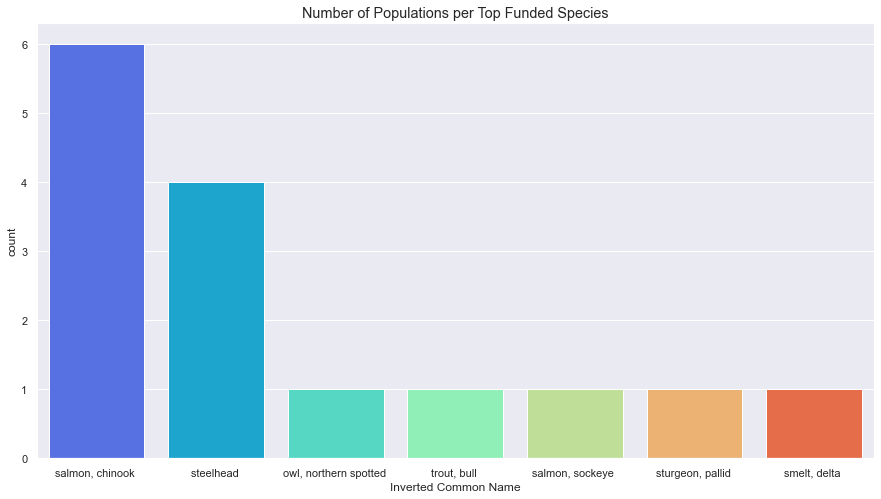

In [15]:
sns.countplot(x="Inverted Common Name", data=_2018top_15,
              palette="rainbow")
plt.title('Number of Populations per Top Funded Species', size='large')

## Merged Expenditures Data

In [16]:
expend_df = expend2018_df.merge(expend2017_df, how="inner", 
                 on=['Group','Scientific Name','Inverted Common Name','Status','Area'])

In [17]:
# Stats for combined FY 2017 - 2018
expend_df.describe()

,FWS 2018,Other Fed 2018,States 2018,Total 2018,FWS 2017,Other Fed 2017,States 2017,Total 2017
count,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03
mean,9.085917e+04,2.327429e+06,3.984581e+05,2.816746e+06,1.044331e+05,2.498456e+06,8.260470e+04,2.685020e+06
std,3.000113e+05,8.547600e+06,4.085245e+06,1.005861e+07,3.654139e+05,1.076055e+07,4.184275e+05,1.098059e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+01
25%,5.000000e+03,0.000000e+00,0.000000e+00,7.871000e+03,4.821000e+03,0.000000e+00,0.000000e+00,9.433500e+03
50%,1.029400e+04,3.076000e+03,0.000000e+00,2.341100e+04,1.067000e+04,4.800000e+03,0.000000e+00,2.907600e+04
75%,5.675000e+04,6.455250e+04,0.000000e+00,2.088930e+05,5.129550e+04,1.277485e+05,7.500000e+02,2.346650e+05
max,5.946849e+06,5.963197e+07,6.306780e+07,7.382530e+07,6.610558e+06,1.179275e+08,5.428723e+06,1.192271e+08


As expected, there is a positive, linear relationship between other federal funding and total funding for that year:

Text(0.5, 1.0, 'Relationship between 2018 Other Federal Funding and 2018 Total Funding')

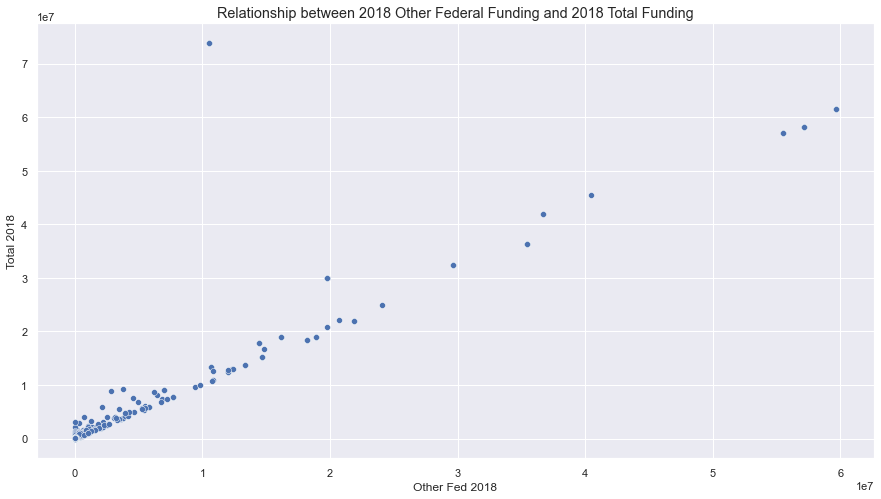

In [18]:
sns.scatterplot(x ='Other Fed 2018' , y = 'Total 2018',
                data = expend_df)
plt.title('Relationship between 2018 Other Federal Funding and 2018 Total Funding',
          size='large')

Now comparing the FWS funding with the total funding, there does not appear to be a strong relationship

Text(0.5, 1.0, 'Relationship between 2018 FWS Funding and 2018 Total Funding')

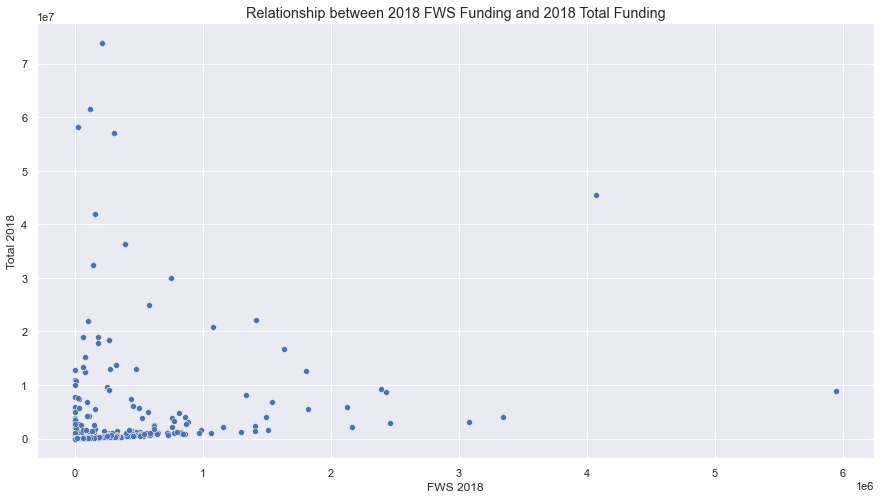

In [19]:
sns.scatterplot(x ='FWS 2018' , y = 'Total 2018', data = expend_df)
plt.title('Relationship between 2018 FWS Funding and 2018 Total Funding',
          size='large')

## ESA Species Data

In [20]:
species_df = pd.read_csv('esa_species.csv')

species_df = species_df[['Group','Status','Scientific Name',
                         'Common Name','Location','Status Category',
                        'Listing Date','Inverted Common Name','Area']]       
species_df.head()

,Group,Status,Scientific Name,Common Name,Location,Status Category,Listing Date,Inverted Common Name,Area
0,Algae,E,isogomphodon oxyrhynchus,daggernose shark,Foreign,Listed,NaN,"shark, daggernose",NaN
1,Amphibians,E,discoglossus nigriventer,israel painted frog,Foreign,Listed,1970-06-02,"frog, israel painted",wherever found
2,Amphibians,RT,eurycea species,comal springs salamander,Domestic,Not Listed,NaN,"salamander, comal springs",wherever found
3,Amphibians,E,leiopelma hamiltoni,stephen island frog,Foreign,Listed,1970-06-02,"frog, stephen island",wherever found
4,Amphibians,UR,pseudobranchus striatus lustricolus,gulf hammock dwarf siren,Domestic,"Petitioned for Listing, Under Review",NaN,"siren, gulf hammock dwarf",wherever found


After ordering the data according to group, I noticed an error.
At index 0, the Daggernose Shark is listed in the Algae Group. There could be further errors in the data that I did not find during data cleaning

In [21]:
#Dropping the the row due to error in data
species_df = species_df.drop(index=[0])

### Distributions :


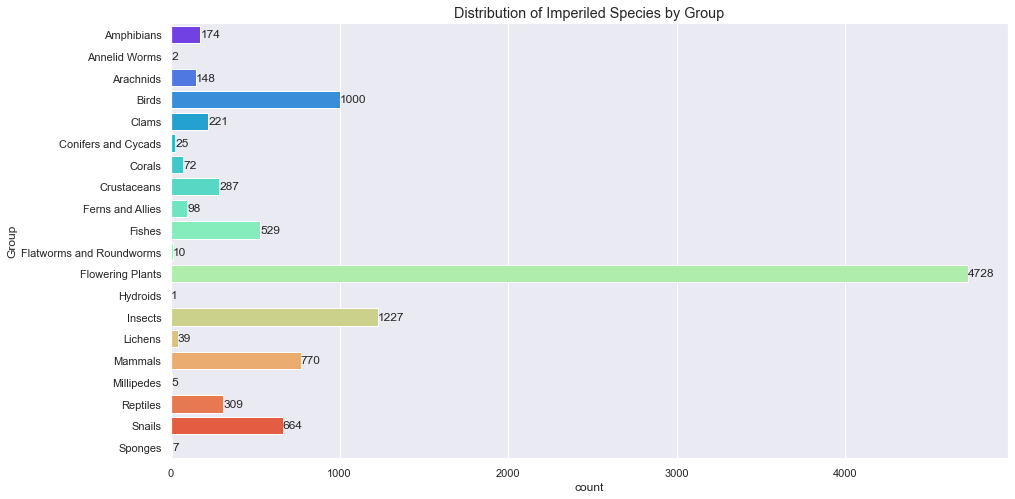

In [22]:
group_plt = sns.countplot(y="Group", data=species_df,
                          palette="rainbow")
plt.title('Distribution of Imperiled Species by Group',size='large')
for container in group_plt.containers:
    group_plt.bar_label(container)


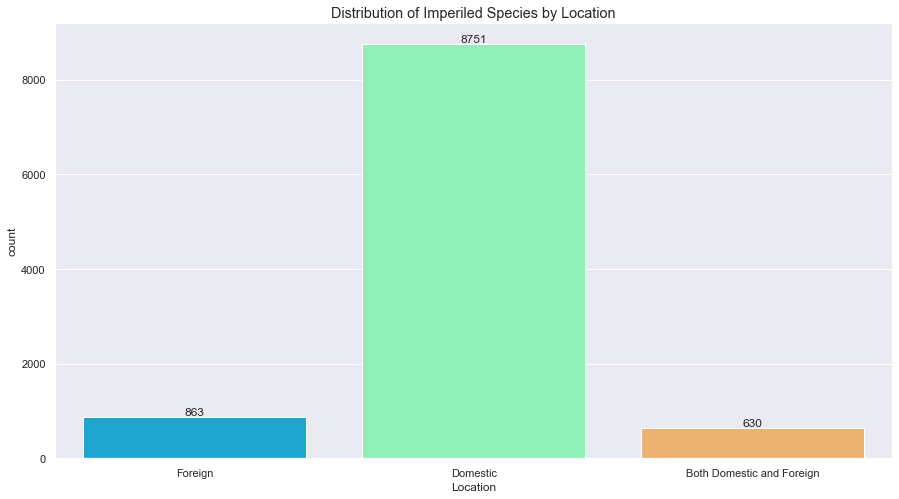

In [23]:
location_plt = sns.countplot(x="Location", data=species_df, palette="rainbow")
plt.title('Distribution of Imperiled Species by Location',
          size='large')
for container in location_plt.containers:
    location_plt.bar_label(container)

source for status codes: https://ecos.fws.gov/ecp0/html/db-status.html

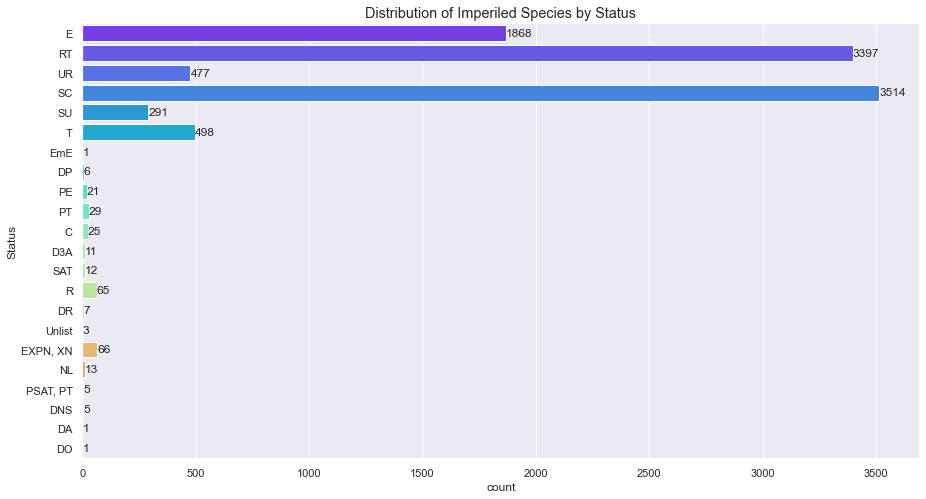

In [24]:
status_plt = sns.countplot(y="Status", data=species_df,
                          palette="rainbow")
plt.title('Distribution of Imperiled Species by Status',size='large')
for container in status_plt.containers:
    status_plt.bar_label(container)

## ESA Recovery Plans Data

In [25]:
plans_df = pd.read_csv('esa_recovery_plans.csv')
plans_df = plans_df[['Group','Status','Scientific Name',
                    'Common Name','Recovery Actions',
                    'Recovery Document Date','Region','Area']]  
plans_df.head()

,Group,Status,Scientific Name,Common Name,Recovery Actions,Recovery Document Date,Region,Area
0,Mammals,E,myotis sodalis,indiana bat,116.0,2007-04-16,Great Lakes-Big Rivers Region,wherever found
1,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,1993-09-10,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
2,Mammals,T,odocoileus virginianus leucurus,columbian white-tailed deer,14.0,1983-06-14,Pacific Region,columbia river dps
3,Mammals,E,mustela nigripes,black-footed ferret,84.0,2013-12-23,Mountain-Prairie Region,"wherever found, except where listed as an expe..."
4,Mammals,E,vulpes macrotis mutica,san joaquin kit fox,84.0,1998-09-30,California/Nevada Region,wherever found


## Distributions

Let's take a look at the regional distribution of species:

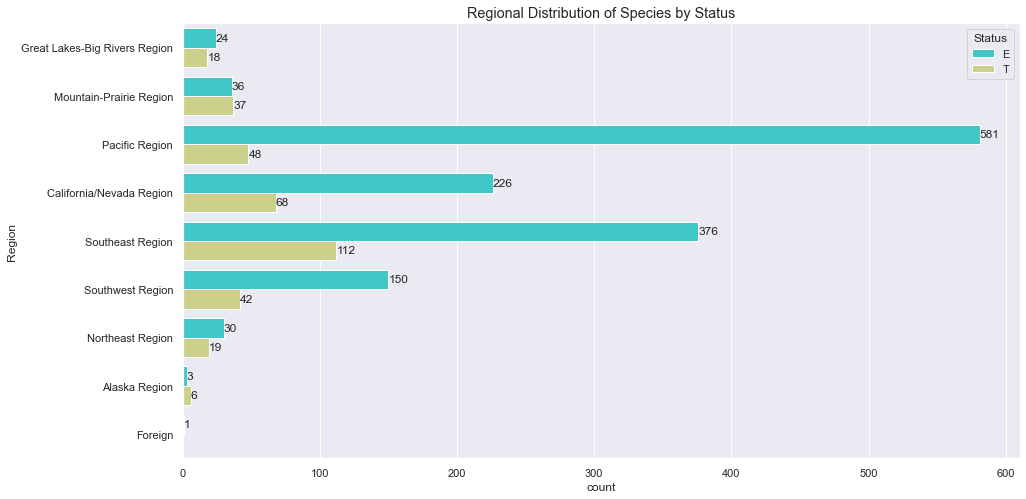

In [26]:
region_plt = sns.countplot(y="Region", hue="Status", data=plans_df, palette="rainbow")
plt.title('Regional Distribution of Species by Status',size='large')
for container in region_plt.containers:
    region_plt.bar_label(container)

Note: There are more recovery plans for endangered species in all regions except Alaska and the Mountain-Prairie Region.

### Distribution of Recovery Actions:

Text(0.5, 1.0, 'Total Recovery Actions USD per Group')

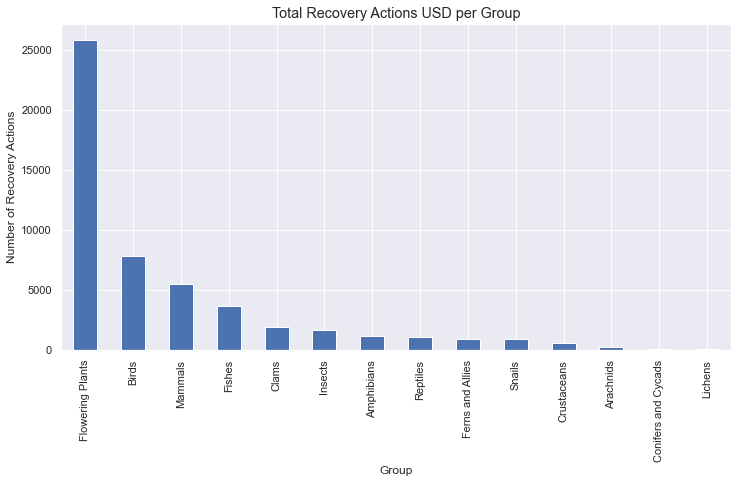

In [27]:
plt.figure(figsize = (12,6))
plans_df.groupby('Group')['Recovery Actions'].sum().sort_values(ascending=False).plot.bar(color = 'b')
plt.xlabel('Group')
plt.ylabel('Number of Recovery Actions')
plt.title('Total Recovery Actions USD per Group', size = 'large')


In [28]:
top_actions = plans_df.sort_values(by="Recovery Actions",
                                        ascending=False).head(15)
top_actions

,Group,Status,Scientific Name,Common Name,Recovery Actions,Recovery Document Date,Region,Area
1575,Fishes,T,salvelinus confluentus,bull trout,770.0,2015-09-30,Pacific Region,"u.s.a., conterminous, lower 48 states"
57,Birds,E,palmeria dolei,crested honeycreeper (akohekohe),362.0,2006-09-22,Pacific Region,wherever found
64,Birds,E,pseudonestor xanthophrys,maui parrotbill (kiwikiu),362.0,2006-09-22,Pacific Region,wherever found
1265,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,1996-09-11,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1268,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,2018-05-16,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,1993-09-10,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1269,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,2017-05-04,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1264,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,2013-05-03,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1266,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,1997-06-23,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."
1267,Mammals,T,ursus arctos horribilis,grizzly bear,329.0,2007-03-13,Mountain-Prairie Region,"u.s.a., conterminous (lower 48) states, except..."


## Merges:

I attempted to merge expenditures data with ESA recovery plans data to see if there was a relationship between funding and recovery actions.
I was surprised to find that the result produced only 1 row...
I would not expect there to be this drastic of a change in under 5 years. 
This could be due to an error in the data that requires further review.

In [29]:
expend2018_df.merge(plans_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area,Common Name,Recovery Actions,Recovery Document Date,Region
0,Flowering Plants,E,scirpus ancistrochaetus,"bulrush, northeastern",75395,13440,8038,96873,NaN,northeastern bulrush,35.0,1993-08-25,Northeast Region


Only 1 row in common with the current FWS species data

In [30]:
expend2018_df.merge(species_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name_x,FWS 2018,Other Fed 2018,States 2018,Total 2018,Area,Common Name,Location,Status Category,Listing Date,Inverted Common Name_y
0,Flowering Plants,E,scirpus ancistrochaetus,"bulrush, northeastern",75395,13440,8038,96873,NaN,northeastern bulrush,Domestic,Listed,1991-05-07,"bulrush, northeastern"


No rows in common for the 2017 data... but this is incorrect. The bull trout is listed in both data frames, and there are likely others that are not showing up as well.

In [34]:
expend2017_df.merge(plans_df, how="inner", 
                 on=['Group','Status','Scientific Name'])

,Group,Status,Scientific Name,Inverted Common Name,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area_x,Common Name,Recovery Actions,Recovery Document Date,Region,Area_y


Only 1 row in common with the current FWS species data

In [32]:
expend2017_df.merge(species_df, how="inner", 
                 on=['Group','Scientific Name', 'Status', 'Area'])

,Group,Status,Scientific Name,Inverted Common Name_x,FWS 2017,Other Fed 2017,States 2017,Total 2017,Area,Common Name,Location,Status Category,Listing Date,Inverted Common Name_y
0,Fishes,T,epinephelus striatus,"grouper, nassau",0,464945,0,464945,NaN,nassau grouper,Both Domestic and Foreign,Listed,2016-07-29,"grouper, nassau"
